In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
user_profile = pd.read_csv('./data/userprofile.csv')

In [3]:
user_payments = pd.read_csv('./data/userpayment.csv')

In [4]:
user_cuisine = pd.read_csv('./data/usercuisine.csv')

## User Profile: Data Cleaning

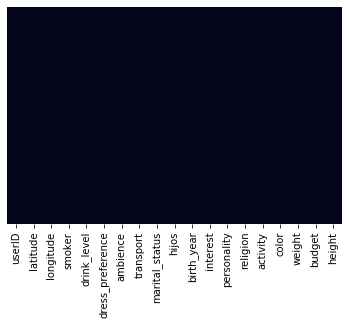

In [5]:
# Check for null values
sns.heatmap(data=user_profile.isnull(),cbar=False,yticklabels=False)

In [6]:
user_profile.tail()

,userID,latitude,longitude,smoker,drink_level,dress_preference,ambience,transport,marital_status,hijos,birth_year,interest,personality,religion,activity,color,weight,budget,height
133,U1134,22.149654,-100.998610,false,casual drinker,no preference,family,public,single,independent,1991,variety,hard-worker,Catholic,student,black,52,medium,1.65
134,U1135,22.170396,-100.949936,false,casual drinker,informal,family,on foot,single,kids,1988,variety,hunter-ostentatious,Catholic,student,purple,66,low,1.54
135,U1136,22.149607,-100.997235,true,social drinker,no preference,friends,car owner,single,independent,1990,retro,thrifty-protector,Catholic,student,black,50,low,1.60
136,U1137,22.144803,-100.944623,false,social drinker,formal,family,public,single,independent,1989,eco-friendly,hard-worker,Catholic,student,blue,72,low,1.78
137,U1138,22.152884,-100.939663,false,social drinker,formal,friends,public,single,independent,1991,variety,thrifty-protector,none,student,blue,54,medium,1.55


In [7]:
# Drop unneccesary fetures
user_profile.drop(['latitude','longitude','religion','hijos','color','weight','height'],axis=1,inplace=True)

In [8]:
user_cuisine.tail()

,userID,Rcuisine
325,U1135,Southern
326,U1135,Dessert-Ice_Cream
327,U1136,Mexican
328,U1137,Mexican
329,U1138,Pizzeria


In [9]:
user_cuisine['Rcuisine'].value_counts()

Mexican             97
American            11
Cafeteria            9
Pizzeria             9
Cafe-Coffee_Shop     8
                    ..
Greek                1
Chilean              1
Eclectic             1
Armenian             1
Dim_Sum              1
Name: Rcuisine, Length: 103, dtype: int64

In [10]:
# Establish users' preffered cuisine
# ***Assumption: The first cuisine is the preffered users' cuisine
def get_cuisine(userID):
    return list(user_cuisine[user_cuisine['userID'] == userID]['Rcuisine'])[0]

user_profile['preffered_cuisine'] = user_profile['userID'].apply(get_cuisine)

In [11]:
user_payments['Upayment'].value_counts()

cash                   131
bank_debit_cards        22
VISA                    17
MasterCard-Eurocard      4
American_Express         3
Name: Upayment, dtype: int64

In [12]:
# Ignore payment feature since most users use cash

In [13]:
# Final User Profile Data
user_profile.head()

,userID,smoker,drink_level,dress_preference,ambience,transport,marital_status,birth_year,interest,personality,activity,budget,preffered_cuisine
0,U1001,false,abstemious,informal,family,on foot,single,1989,variety,thrifty-protector,student,medium,American
1,U1002,false,abstemious,informal,family,public,single,1990,technology,hunter-ostentatious,student,low,Mexican
2,U1003,false,social drinker,formal,family,public,single,1989,none,hard-worker,student,low,Mexican
3,U1004,false,abstemious,informal,family,public,single,1940,variety,hard-worker,professional,medium,Bakery
4,U1005,false,abstemious,no preference,family,public,single,1992,none,thrifty-protector,student,medium,American


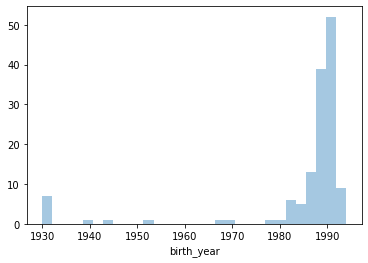

In [14]:
# Distribution of ages
sns.distplot(user_profile['birth_year'],bins=30,kde=False)

In [15]:
user_profile['drink_level'].value_counts()

abstemious        51
casual drinker    47
social drinker    40
Name: drink_level, dtype: int64

In [16]:
drink_level = pd.get_dummies(data=user_profile['drink_level'],drop_first=True)
user_profile = pd.concat([user_profile.reset_index(drop=True),drink_level.reset_index(drop=True)],axis=1)
user_profile.drop('drink_level',axis=1,inplace=True)

In [17]:
user_profile['dress_preference'].value_counts()

no preference    53
formal           41
informal         35
?                 5
elegant           4
Name: dress_preference, dtype: int64

In [38]:
def dressing_encoder(criteria):
    if criteria == 'no preference' or criteria == '?':
        return 'no preference'
    else:
        return criteria

user_profile['dress_preference'] = user_profile['dress_preference'].apply(dressing_encoder)

In [43]:
dressing = pd.get_dummies(data=user_profile['dress_preference'],drop_first=True)
user_profile = pd.concat([user_profile.reset_index(drop=True),dressing.reset_index(drop=True)],axis=1)
user_profile.drop(['dress_preference'],axis=1,inplace=True)

In [50]:
user_profile['smoker'].value_counts()

0    112
1     26
Name: smoker, dtype: int64

In [49]:
def smoking_encoder(criteria):
    if criteria == 'false' or criteria == '?':
        return 0
    else:
        return 1

user_profile['smoker'] = user_profile['smoker'].apply(smoking_encoder)

In [70]:
user_profile['budget'].value_counts()

medium    91
low       35
?          7
high       5
Name: budget, dtype: int64

In [66]:
personality = pd.get_dummies(data=user_profile['personality'],drop_first=True)
user_profile = pd.concat([user_profile.reset_index(drop=True),personality.reset_index(drop=True)],axis=1)
user_profile.drop(['personality'],axis=1,inplace=True)

In [67]:
interest = pd.get_dummies(data=user_profile['interest'],drop_first=True)
user_profile = pd.concat([user_profile.reset_index(drop=True),interest.reset_index(drop=True)],axis=1)
user_profile.drop(['interest'],axis=1,inplace=True)

In [68]:
user_profile.tail()

,userID,smoker,ambience,transport,marital_status,birth_year,activity,budget,preffered_cuisine,casual drinker,...,formal,informal,no preference,hard-worker,hunter-ostentatious,thrifty-protector,none,retro,technology,variety
133,U1134,0,family,public,single,1991,student,medium,Mexican,1,...,0,0,1,1,0,0,0,0,0,1
134,U1135,0,family,on foot,single,1988,student,low,Organic-Healthy,1,...,0,1,0,0,1,0,0,0,0,1
135,U1136,1,friends,car owner,single,1990,student,low,Mexican,0,...,0,0,1,0,0,1,0,1,0,0
136,U1137,0,family,public,single,1989,student,low,Mexican,0,...,1,0,0,1,0,0,0,0,0,0
137,U1138,0,friends,public,single,1991,student,medium,Pizzeria,0,...,1,0,0,0,0,1,0,0,0,1


## Places: Data Cleaning

In [19]:
restaurants = pd.read_csv('./data/geoplaces2.csv')

In [20]:
restaurants.head()

,placeID,latitude,longitude,the_geom_meter,name,address,city,state,country,fax,...,alcohol,smoking_area,dress_code,accessibility,price,url,Rambience,franchise,area,other_services
0,134999,18.915421,-99.184871,0101000020957F000088568DE356715AC138C0A525FC46...,Kiku Cuernavaca,Revolucion,Cuernavaca,Morelos,Mexico,?,...,No_Alcohol_Served,none,informal,no_accessibility,medium,kikucuernavaca.com.mx,familiar,f,closed,none
1,132825,22.147392,-100.983092,0101000020957F00001AD016568C4858C1243261274BA5...,puesto de tacos,esquina santos degollado y leon guzman,s.l.p.,s.l.p.,mexico,?,...,No_Alcohol_Served,none,informal,completely,low,?,familiar,f,open,none
2,135106,22.149709,-100.976093,0101000020957F0000649D6F21634858C119AE9BF528A3...,El Rinc�n de San Francisco,Universidad 169,San Luis Potosi,San Luis Potosi,Mexico,?,...,Wine-Beer,only at bar,informal,partially,medium,?,familiar,f,open,none
3,132667,23.752697,-99.163359,0101000020957F00005D67BCDDED8157C1222A2DC8D84D...,little pizza Emilio Portes Gil,calle emilio portes gil,victoria,tamaulipas,?,?,...,No_Alcohol_Served,none,informal,completely,low,?,familiar,t,closed,none
4,132613,23.752903,-99.165076,0101000020957F00008EBA2D06DC8157C194E03B7B504E...,carnitas_mata,lic. Emilio portes gil,victoria,Tamaulipas,Mexico,?,...,No_Alcohol_Served,permitted,informal,completely,medium,?,familiar,t,closed,none


In [21]:
# Drop unneccesary features
restaurants.drop(['latitude','longitude','the_geom_meter','address','city','state','fax'],axis=1,inplace=True)

In [22]:
restaurants.drop(['zip','url','other_services'],axis=1,inplace=True)

In [23]:
restaurants.tail()

,placeID,name,country,alcohol,smoking_area,dress_code,accessibility,price,Rambience,franchise,area
125,132866,Chaires,Mexico,No_Alcohol_Served,not permitted,informal,completely,medium,familiar,f,closed
126,135072,Sushi Itto,Mexico,No_Alcohol_Served,none,informal,no_accessibility,medium,familiar,f,closed
127,135109,Paniroles,?,Wine-Beer,not permitted,informal,no_accessibility,medium,quiet,f,closed
128,135019,Restaurant Bar Coty y Pablo,Mexico,No_Alcohol_Served,none,informal,completely,low,familiar,f,closed
129,132877,sirloin stockade,?,No_Alcohol_Served,none,informal,completely,low,familiar,f,closed


In [24]:
restaurants['smoking_area'].value_counts()

none             70
not permitted    25
section          24
permitted         9
only at bar       2
Name: smoking_area, dtype: int64

In [25]:
def smoking_combiner(criteria):
    if criteria == 'none' or criteria == 'not permitted':
        return 0
    else:
        return 1
restaurants['smoking_area'] = restaurants['smoking_area'].apply(smoking_combiner)

In [26]:
def access_combiner(criteria):
    if criteria == 'completely':
        return 'full'
    elif criteria == 'no_accessibility':
        return 'none'
    else:
        return 'partial'
restaurants['accessibility'] = restaurants['accessibility'].apply(access_combiner)

In [27]:
restaurants['dress_code'].value_counts()

informal    118
casual       10
formal        2
Name: dress_code, dtype: int64

In [28]:
dress_code = pd.get_dummies(restaurants['dress_code'],drop_first=True)
restaurants = pd.concat([restaurants.reset_index(drop=True),dress_code.reset_index(drop=True)],axis=1)
restaurants.drop(['dress_code'],axis=1,inplace=True)

In [29]:
def alcohol_combiner(criteria):
    if criteria == 'No_Alcohol_Served':
        return 'not_served'
    elif criteria == 'Wine-Beer':
        return 'served'
    else:
        return 'Full_Bar'
restaurants['alcohol'] = restaurants['alcohol'].apply(alcohol_combiner)

In [30]:
accessibility = pd.get_dummies(restaurants['accessibility'],drop_first=True,prefix='accessibility')
restaurants = pd.concat([restaurants.reset_index(drop=True),accessibility.reset_index(drop=True)],axis=1)
restaurants.drop(['accessibility'],axis=1,inplace=True)

In [31]:
price = pd.get_dummies(restaurants['price'],drop_first=True,prefix='budget')
restaurants = pd.concat([restaurants.reset_index(drop=True),price.reset_index(drop=True)],axis=1)
restaurants.drop(['price'],axis=1,inplace=True)

In [32]:
ambience = pd.get_dummies(restaurants['Rambience'],drop_first=True,prefix='ambience')
restaurants = pd.concat([restaurants.reset_index(drop=True),ambience.reset_index(drop=True)],axis=1)
restaurants.drop(['Rambience'],axis=1,inplace=True)

In [33]:
franchise = pd.get_dummies(restaurants['franchise'],drop_first=True,prefix='franchise')
restaurants = pd.concat([restaurants.reset_index(drop=True),franchise.reset_index(drop=True)],axis=1)
restaurants.drop(['franchise'],axis=1,inplace=True)

In [34]:
area = pd.get_dummies(restaurants['area'],drop_first=True,prefix='area')
restaurants = pd.concat([restaurants.reset_index(drop=True),area.reset_index(drop=True)],axis=1)
restaurants.drop(['area'],axis=1,inplace=True)

In [35]:
alcohol = pd.get_dummies(restaurants['alcohol'],drop_first=True,prefix='alcohol')
restaurants = pd.concat([restaurants.reset_index(drop=True),alcohol.reset_index(drop=True)],axis=1)
restaurants.drop(['alcohol'],axis=1,inplace=True)

In [36]:
restaurants.drop('country',axis=1,inplace=True)

In [37]:
restaurants.head()

,placeID,name,smoking_area,formal,informal,accessibility_none,accessibility_partial,budget_low,budget_medium,ambience_quiet,franchise_t,area_open,alcohol_not_served,alcohol_served
0,134999,Kiku Cuernavaca,0,0,1,1,0,0,1,0,0,0,1,0
1,132825,puesto de tacos,0,0,1,0,0,1,0,0,0,1,1,0
2,135106,El Rinc�n de San Francisco,1,0,1,0,1,0,1,0,0,1,0,1
3,132667,little pizza Emilio Portes Gil,0,0,1,0,0,1,0,0,1,0,1,0
4,132613,carnitas_mata,1,0,1,0,0,0,1,0,1,0,1,0
